# AI PROJECT : Subspecies of Roses Classification (CNN)

NAME AND ID STUDENT:
1. NUR AISYIKIN BINTI RAZALI (52213124845)
2. NUR ANIS SYAZWINA BINTI AZIZ (52213124824)

PAI L02 - GROUP 6

DOMAIN: 

"Subspecies of Roses"
Capture the diversity within roses, including Gallica roses, Damask roses, Alba roses, and Centifolia roses, showcasing their unique petal arrangements, colors, and fragrances.



TASK ROLES:

DATA ENGINEER : NUR AISYIKIN BINTI RAZALI
DATA SCIENTIST : NUR AISYIKIN BINTI RAZALI
DATA ANALYST : NUR ANIS SYAZWINA BINTI AZIZ

DATA ENGINEER - Data Preparation

* Collecting the data
* Standardizing data
* Creating the dataset for the model

Found 8004 images belonging to 10 classes.
Found 1996 images belonging to 10 classes.


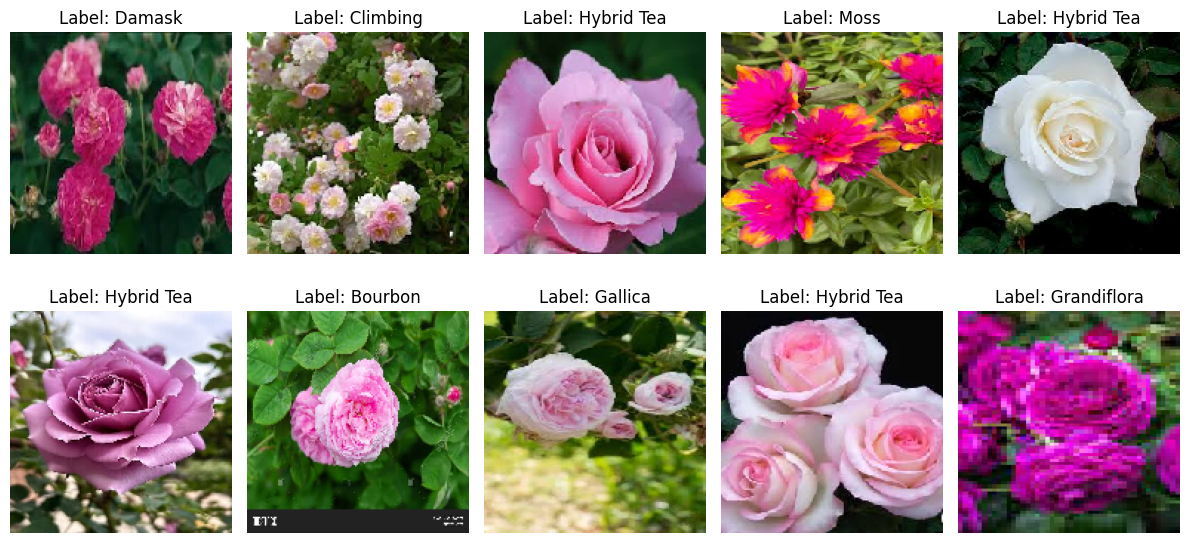

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Path to your dataset directory
dataset_dir = 'rose'  

# ImageDataGenerator for loading and preprocessing images/standardized
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values to [0, 1]
    validation_split=0.2  # Use 20% of the data for validation
)

# Load training data
train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=20,           # Number of images per batch
    class_mode='categorical',  # For multiclass classification
    subset='training' ,        # Load training subset
    shuffle=True
)

# Load validation data
val_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',  # For multiclass classification
    subset='validation'  
    
)

# Display a batch of images
images, labels = next(train_data)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    # Show label (decode index from the label array)
    label_index = labels[i].argmax()  # Get the index of the maximum value in the one-hot encoding
    class_label = train_data.class_indices  # Get the class-to-index mapping
    class_names = list(class_label.keys())  # Get class names
    ax.set_title(f"Label: {class_names[label_index]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


2. DATA SCIENTIST - Data Modelling

* Creating neural network model
* Training the model
* Perform hyperparameter tuning



a. Create model and train the Simple CNN model

In [2]:
from tensorflow.keras import models, layers

# Function to create a simple CNN model
def create_simple_cnn(num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Get the number of classes
num_classes = len(train_data.class_indices)

# Create and compile the Simple CNN model
simple_cnn = create_simple_cnn(num_classes)
simple_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Simple CNN model
history_simple_cnn = simple_cnn.fit(
    train_data,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_data,
    validation_steps=len(val_data)
)



c:\Users\USER\Documents\4. PAI\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USER\Documents\4. PAI\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.1501 - loss: 14.8340 - val_accuracy: 0.2505 - val_loss: 2.1069
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.3332 - loss: 2.0076 - val_accuracy: 0.3121 - val_loss: 2.0150
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.4344 - loss: 1.7340 - val_accuracy: 0.3186 - val_loss: 2.0281
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5337 - loss: 1.5032 - val_accuracy: 0.3577 - val_loss: 1.9208
Epoch 5/10
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2:02 1s/step - accuracy: 0.4000 - loss: 2.5010

c:\Users\USER\Documents\4. PAI\Python\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.4000 - loss: 2.5010 - val_accuracy: 0.3597 - val_loss: 1.9136
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.6508 - loss: 1.2295 - val_accuracy: 0.3737 - val_loss: 1.9310
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7091 - loss: 1.0340 - val_accuracy: 0.4023 - val_loss: 1.9850
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7472 - loss: 0.8952 - val_accuracy: 0.4374 - val_loss: 1.9325
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8049 - loss: 0.7453 - val_accuracy: 0.4274 - val_loss: 2.0664
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.7500 - loss: 0.8484 - val_accuracy: 0.4238 - val_loss: 2.0442


b. Perform hyperparameter tuning 

In [3]:
import keras_tuner as kt

def build_model(hp):
    model = models.Sequential()
    # Tune the number of Conv2D layers
    for i in range(hp.Int('conv_blocks', 1, 3, default=2)):
        model.add(layers.Conv2D(filters=hp.Int(f'filters_{i}', 32, 128, step=32),
                                kernel_size=(3, 3),
                                activation='relu'))
        model.add(layers.MaxPooling2D(2, 2))
    
    model.add(layers.Flatten())
    # Tune the number of Dense units
    model.add(layers.Dense(hp.Int('dense_units', 128, 512, step=128),
                            activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

# Get the number of classes
num_classes = len(train_data.class_indices)



In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Maximum number of hyperparameter combinations to test
    directory='hyperparameter_tuning1',
    project_name='cnn_tuning'
)

# Start the search
tuner.search(train_data,
             validation_data=val_data,
             epochs=5)

# Retrieve the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of Conv layers: {best_hps.get('conv_blocks')}")
print(f"Best number of dense units: {best_hps.get('dense_units')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Build and train the best model
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_data, validation_data=val_data, epochs=5)

# FYI: conv_blocks = convolutional layers

Reloading Tuner from hyperparameter_tuning1\cnn_tuning\tuner0.json
Best number of Conv blocks: 2
Best number of dense units: 256
Best learning rate: 0.0001
Epoch 1/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 644s 2s/step - accuracy: 0.2229 - loss: 2.1887 - val_accuracy: 0.2986 - val_loss: 1.9792
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 627s 2s/step - accuracy: 0.3776 - loss: 1.8413 - val_accuracy: 0.3422 - val_loss: 1.8894
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 656s 2s/step - accuracy: 0.4643 - loss: 1.5691 - val_accuracy: 0.3813 - val_loss: 1.8371
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.6219 - loss: 1.2119 - val_accuracy: 0.4319 - val_loss: 1.7965
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7382 - loss: 0.8870 - val_accuracy: 0.4534 - val_loss: 1.8313


In [ ]:
# Optional testing

# Create a test data generatorn
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    dataset_dir,  # Specify your test dataset directory
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    shuffle=False
)

# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model for future use
model.save('best_simple_cnn_model.h5')


Found 10000 images belonging to 10 classes.
500/500 ━━━━━━━━━━━━━━━━━━━━ 117s 233ms/step - accuracy: 0.7609 - loss: 0.8415


Test Accuracy: 0.76


3. DATA ANALYST - Data visualization

* Visual the dataset to identify the class and labels
* Understand the dataset to achieve the goals
* Visualize the performance of the training model


a. Show the Graphs for Model Loss and Accuracy

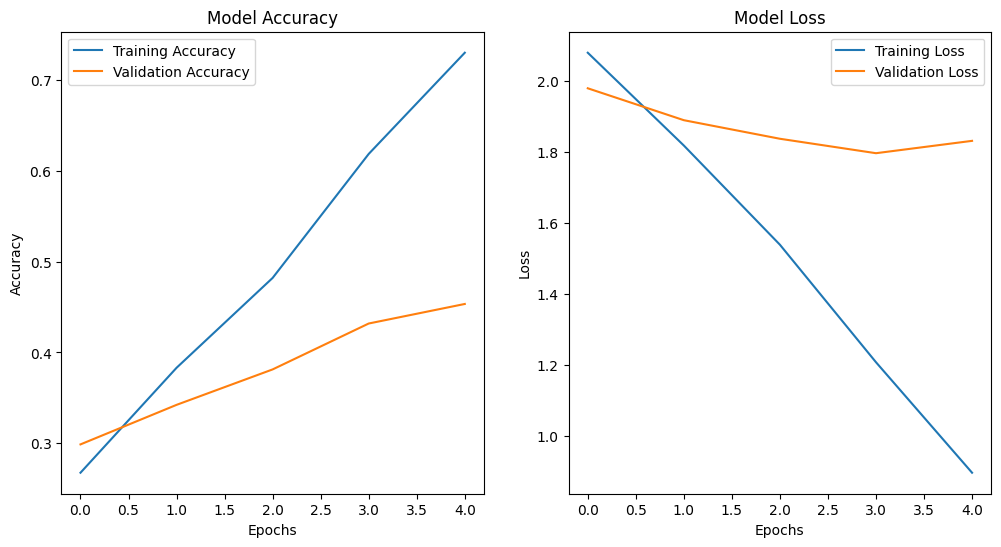

In [6]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function
plot_metrics(history)


b.  Display the Evaluation Using Confusion Matrix

500/500 ━━━━━━━━━━━━━━━━━━━━ 125s 248ms/step


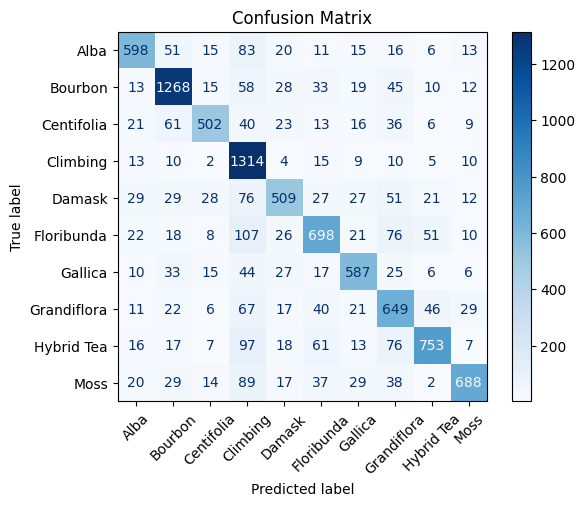

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def display_confusion_matrix(test_generator, model):
    # Predict the classes
    test_steps = test_generator.samples // test_generator.batch_size
    predictions = model.predict(test_generator, steps=test_steps, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Create confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

# Call the function
display_confusion_matrix(test_generator, model)


c. Evaluate the Performance of the Model Against the Testing Dataset

In [8]:
from sklearn.metrics import classification_report

def evaluate_performance(test_generator, model):
    # Predict the classes
    test_steps = test_generator.samples // test_generator.batch_size
    predictions = model.predict(test_generator, steps=test_steps, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Classification Report
    print('Classification Report:')
    print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

    # Evaluate test accuracy and loss
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"\nTest Loss: {test_loss:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

# Call the function
evaluate_performance(test_generator, model)





500/500 ━━━━━━━━━━━━━━━━━━━━ 121s 241ms/step
Classification Report:
              precision    recall  f1-score   support

        Alba       0.79      0.72      0.76       828
     Bourbon       0.82      0.84      0.83      1501
  Centifolia       0.82      0.69      0.75       727
    Climbing       0.67      0.94      0.78      1392
      Damask       0.74      0.63      0.68       809
  Floribunda       0.73      0.67      0.70      1037
     Gallica       0.78      0.76      0.77       770
 Grandiflora       0.64      0.71      0.67       908
  Hybrid Tea       0.83      0.71      0.76      1065
        Moss       0.86      0.71      0.78       963

    accuracy                           0.76     10000
   macro avg       0.77      0.74      0.75     10000
weighted avg       0.77      0.76      0.76     10000

500/500 ━━━━━━━━━━━━━━━━━━━━ 118s 235ms/step - accuracy: 0.7609 - loss: 0.8415

Test Loss: 0.86
Test Accuracy: 0.76


In [9]:
from sklearn.metrics import average_precision_score

# Get true classes from test generator
true_classes = test_generator.classes

# Get predictions from the model
test_steps = test_generator.samples // test_generator.batch_size
test_predictions = model.predict(test_generator, steps=test_steps, verbose=1)

# Calculate average precision for each class
average_precisions = []
for i in range(len(test_generator.class_indices)):
    true_binary = (true_classes == i).astype(int)
    average_precision = average_precision_score(true_binary, test_predictions[:, i])
    average_precisions.append(average_precision)
    print(f"Class {list(test_generator.class_indices.keys())[i]}: AP = {average_precision:.4f}")

# Overall mAP
mAP = np.mean(average_precisions)
print(f"Mean Average Precision (mAP): {mAP:.4f}")

500/500 ━━━━━━━━━━━━━━━━━━━━ 119s 237ms/step
Class Alba: AP = 0.8349
Class Bourbon: AP = 0.9160
Class Centifolia: AP = 0.8273
Class Climbing: AP = 0.9346
Class Damask: AP = 0.7524
Class Floribunda: AP = 0.7873
Class Gallica: AP = 0.8302
Class Grandiflora: AP = 0.7454
Class Hybrid Tea: AP = 0.8362
Class Moss: AP = 0.8549
Mean Average Precision (mAP): 0.8319


In [12]:
def draw_conclusion(best_hps, history, test_generator, model):
    # Test accuracy and loss
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Retrieve hyperparameters
    conv_blocks = best_hps.get('conv_blocks')
    dense_units = best_hps.get('dense_units')
    learning_rate = best_hps.get('learning_rate')

    # Approximate training time
    training_time = len(history.history['accuracy']) * 5 # Assuming average batch time per epoch

    print("\n### Model Performance Summary ###")
    print(f"Number of Conv blocks: {conv_blocks}")
    print(f"Number of Dense units: {dense_units}")
    print(f"Learning Rate: {learning_rate}")
    print(f"Final Test Accuracy: {test_accuracy:.2f}")
   



# Call the function
draw_conclusion(best_hps, history, test_generator, model)


500/500 ━━━━━━━━━━━━━━━━━━━━ 117s 234ms/step - accuracy: 0.7609 - loss: 0.8415

### Model Performance Summary ###
Number of Conv blocks: 2
Number of Dense units: 256
Learning Rate: 0.0001
Final Test Accuracy: 0.76


Conclusion:

The chosen model with 2 convolutional layers, 256 dense units, and a learning rate of 0.0001 is the best suited for this classification task. It achieves a test accuracy of 76% and a high Mean Average Precision (mAP) of 83.19%, indicating reliable multi-class classification performance across subspecies with a training time of two to three hours .

We identified the root cause of our machine learning model's performance issues during training. After reviewing the dataset, it appears that the subspecies are too similar to one another. It is likely that the dataset is the root cause, as the distinctions between the subspecies are too minimal for the model to effectively capture.This highlights the need for a more distinct dataset or feature engineering to improve accuracy.